# January 5, 2024

Starting to work with data from multiple sensors at once.

Sensors are labelled below.  Distances:

* 1->2: 16.7 cm
* 1->3: 16.2 cm
* 2->3: 14.5 cm
* Width: 22 cm
* Length: 17 cm

Impact was made with the Hammer o' Science(tm); the point of impact was on the wooden clamp over Sensor 1, where marked with a black `X`.

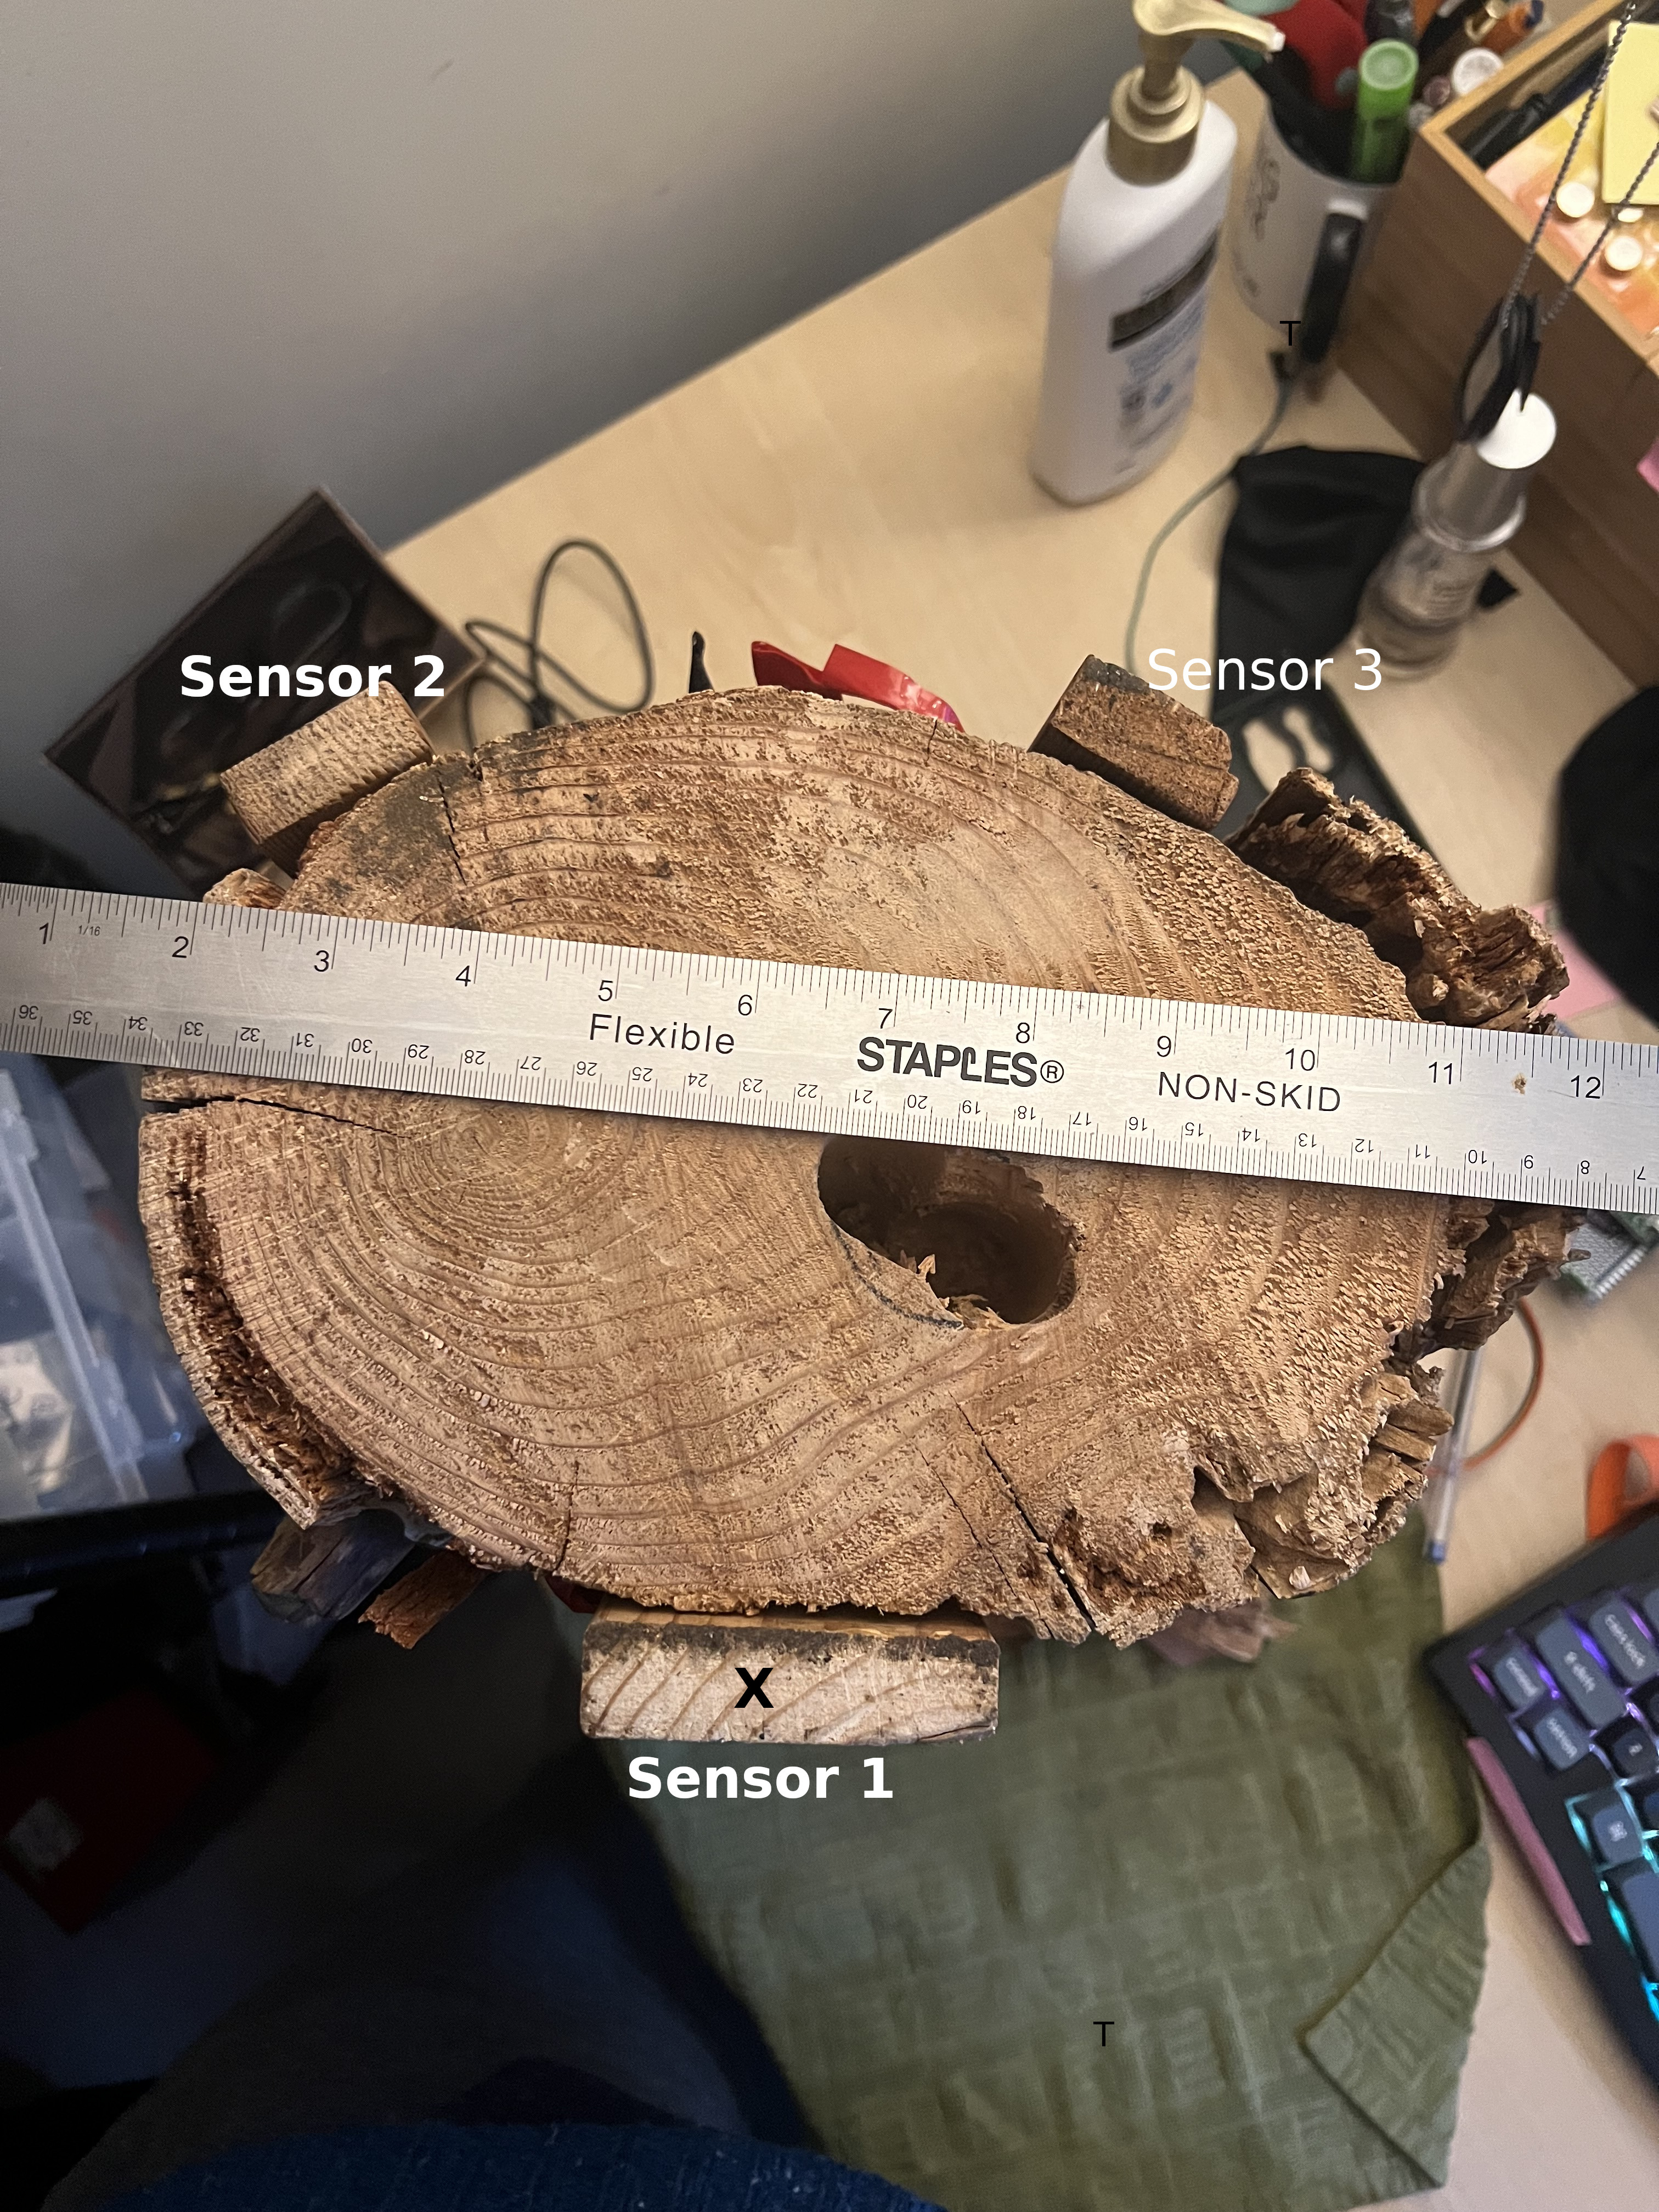

In [1]:
from IPython.display import Image
Image("IMG_4086.jpeg", width=400)

In [2]:
from datetime import datetime, timedelta
import json
import pytz

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
# pd.set_option('max_columns', 50)

mpl.style.use('ggplot')

%matplotlib inline
mpl.rcParams["figure.figsize"] = (12, 10)

In [9]:
# First run
data = "2024-01-05_09:27:25.csv"

def read_csv(filename: str, drop_cols: list = ["idx"], filter_zeroes: bool = True, calculate_ratio: bool = True) -> pd.DataFrame:
    """Read CSV file, return dataframe.

    Args:
      filename (str): name of CSV file to read.
      drop_cols (list): list of columns to drop.  Currently, the logger
        includes a column named "idx", which is just the row number;
        the default value for drop_cols is that column.
      filter_zeroes (bool): if True, drop any rows in which any column
        value is zero.
      calculate_ratio (bool): if True, add a column named "ratio", which
        is the ratio of the "1->3" column to the "1->2" column.

    Returns:
      pd.DataFrame: dataframe 
    """
    df = pd.read_csv(filename)

    if drop_cols:
        df.drop(columns=drop_cols, inplace=True)

    if filter_zeroes:
        df = df.replace(0, np.nan)
        df = df.dropna(how='any', axis=0)

    if calculate_ratio:
        df["ratio"] = df["1->3"] / df["1->2"]

    return df


df = read_csv(data)

# Row 42 is a massive outlier -- let's drop it.

This is based on visual examination of the data.  But a more robust approach is outlined here: https://stackoverflow.com/a/69001342/1958301

In [10]:
print(df.iloc[42])
df.drop(labels=42, axis=0, inplace=True)

1->2     1.130588e+06
1->3     1.130648e+06
ratio    1.000053e+00
Name: 42, dtype: float64


In [11]:
df

1->2     1->3     ratio
0   403.32   500.36  1.240603
1   295.56   880.52  2.979158
2   367.10   472.76  1.287823
3   216.10   311.64  1.442110
4   715.28  3279.42  4.584806
5   187.28   274.94  1.468069
6   400.60   495.30  1.236395
7   390.16   479.98  1.230213
8   421.24   498.26  1.182841
9   391.14   474.56  1.213274
10  389.08   471.20  1.211062
11  380.44   477.66  1.255546
12  381.16   474.48  1.244832
13  384.48   467.72  1.216500
14  395.16   482.84  1.221885
15  403.50   478.10  1.184882
16  399.52   481.02  1.203995
17  423.36   496.22  1.172099
18  406.16   490.82  1.208440
19  410.80   489.28  1.191042
20  495.94   577.92  1.165302
21  487.60   578.04  1.185480
22  493.62   581.00  1.177019
23  487.38   578.40  1.186754
24  409.54   486.36  1.187576
25  398.20   472.92  1.187644
26  409.86   492.08  1.200605
27  384.12   458.04  1.192440
28  470.90   538.26  1.143045
29  376.96   462.52  1.226974
30  402.96   482.72  1.197935
31  396.68   474.42  1.195977
32  426.20   506.58  1.188597
33  407.90   485.90  1.191223
34  248.04   336.44  1.356394
35  229.04   313.14  1.367185
36  400.78   471.10  1.175458
37  409.28   497.12  1.214621
38  399.96   485.10  1.212871
39  342.58   422.18  1.232354
40  211.50   295.78  1.398487
41  390.18   201.72  0.516992
43  451.96   752.68  1.665369
44  417.08   501.84  1.203222
45  409.22   490.60  1.198866
46  223.92   305.04  1.362272
47  229.40   312.94  1.364167
48  141.08   204.10  1.446697
49  236.12   334.94  1.418516
50  226.42   306.26  1.352619

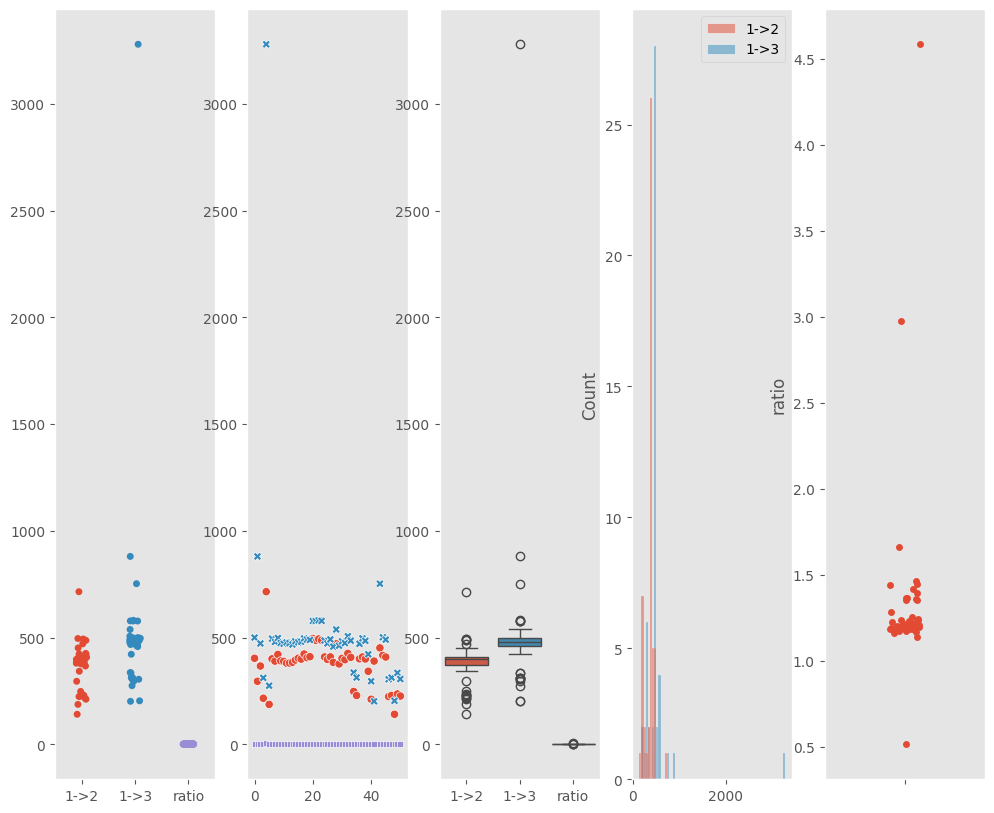

In [20]:
def plot_df(df: pd.DataFrame):
    """Plot a dataframe nicely."""
        
    
    figure, ax = plt.subplots(1, 5)
        # FIXME: axx is a poor variable name
    for axx in ax:
        axx.set_autoscaley_on(True)
        # NOTE: If I add the set_xlim call, the scatter plot gets borked.
        # min_x = 0
        # max_x = 4000
        # axx.set_xlim(min_x, max_x)
        axx.grid()
        
    sns.stripplot(data=df, ax=ax[0])
    sns.scatterplot(data=df, ax=ax[1], legend=False)
    sns.boxplot(data=df, ax=ax[2])
    sns.histplot(data=df[["1->2", "1->3"]], ax=ax[3])
    sns.stripplot(data=df["ratio"], ax=ax[4])    
    plt.show()

plot_df(df)

In [17]:
!ls *csv

2024-01-05_09:27:25.csv  2024-01-05_11:35:37.csv


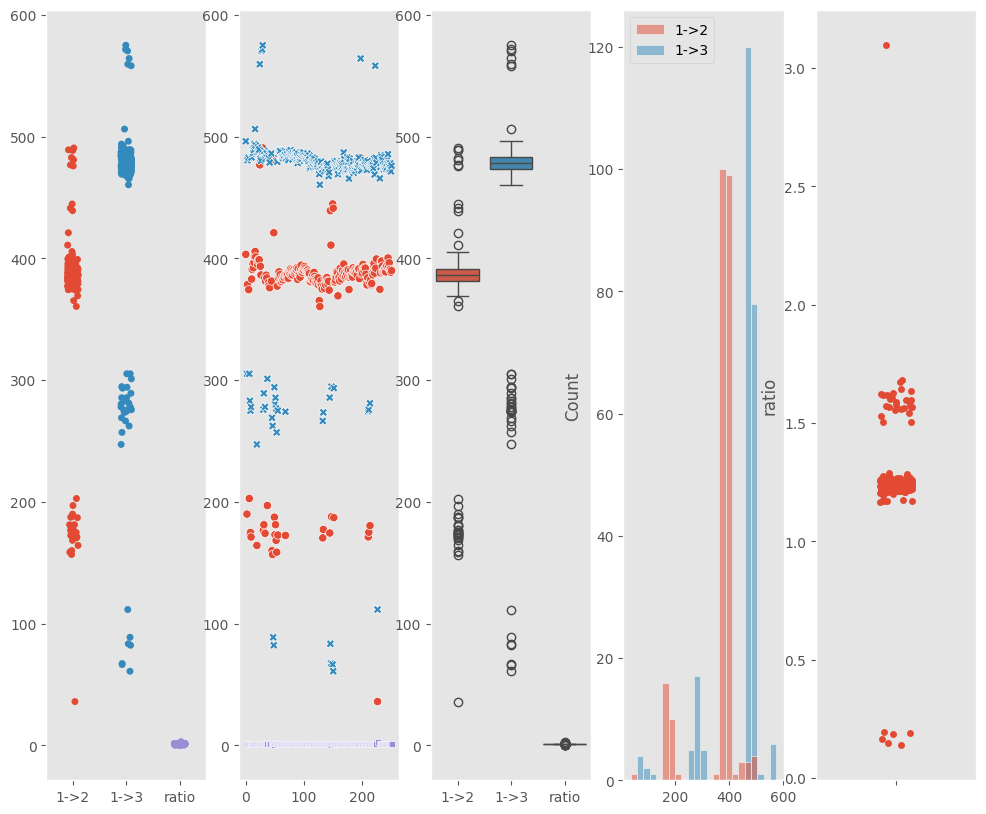

In [21]:
# Second run
data2 = "2024-01-05_11:35:37.csv"

df2 = read_csv(data2)

plot_df(df2)

<Axes: >

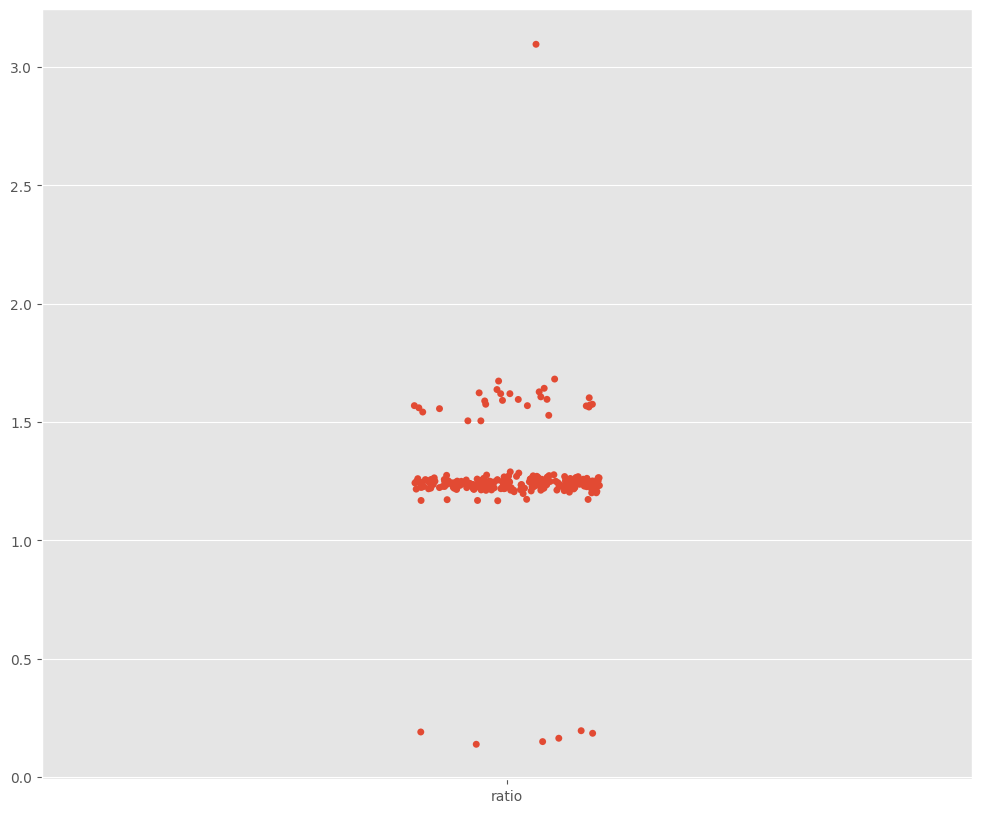

In [23]:
sns.stripplot(data=[df["ratio"], df2["ratio"]])

<Axes: ylabel='ratio'>

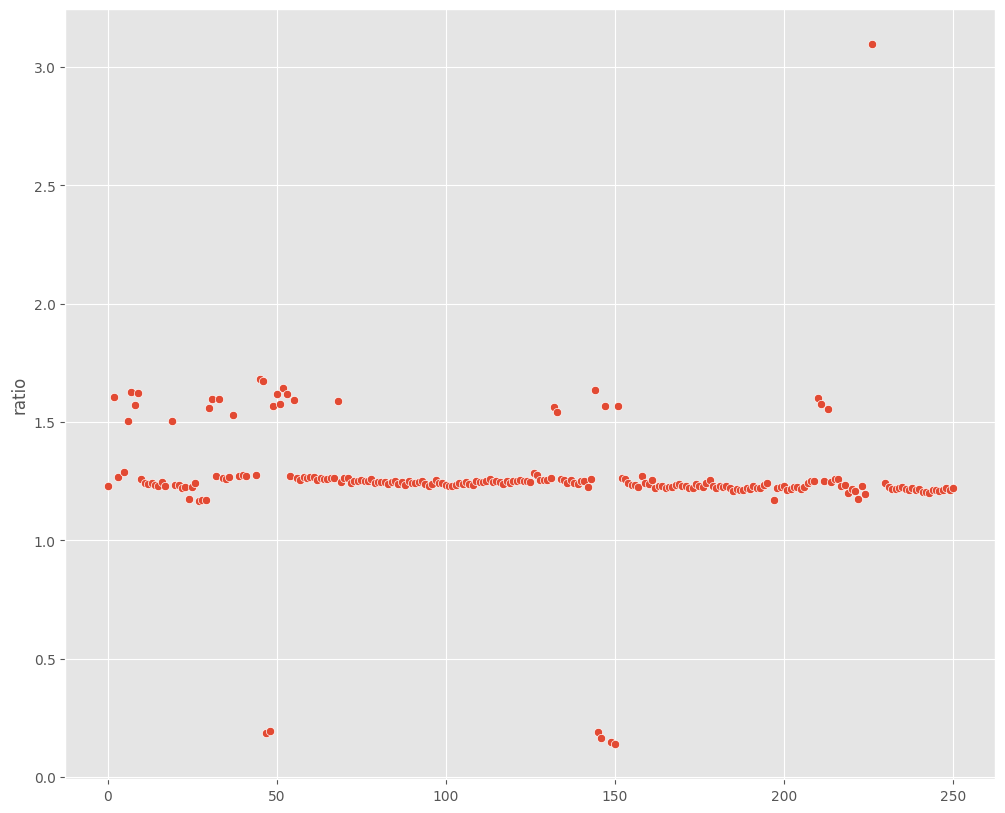

In [26]:
sns.scatterplot(df2.ratio)

In [27]:
df2.mean()

1->2     365.370628
1->3     447.472803
ratio      1.258406
dtype: float64

In [28]:
df2.std()

1->2     73.835400
1->3     91.833527
ratio     0.239612
dtype: float64

In [29]:
df.mean()

1->2     375.517200
1->3     517.664400
ratio      1.341765
dtype: float64

In [30]:
df.std()

1->2      99.134317
1->3     415.689857
ratio      0.548391
dtype: float64

# How much longer is the 1->3 path compared to the 1->2 path?

- The distance from Sensor 1 to Sensor 3 (section `AB`) is approximately 16.5 cm.
- The shortest right-angle distance from the 1->3 chord to the edge of the hole (section `DC`, with `C` being the edge of the hole) is approximately 2.5 cm.
- Using the Pythagorean theorem, `ACB` is `sqrt( (AB / 2)**2 + DC**2)`.  Call that the bank shot distance.



In [31]:
import math

ab = 16.5
cd = 2.5
bank_shot = math.sqrt((ab / 2)**2  + cd**2) * 2
print(f"{bank_shot=}")

bank_shot=17.240939649566666


The ratio of the bank shot to the 1->2 sensor distance is:

In [32]:
bank_shot_ratio = bank_shot / 16.7  # cm; see first cell
print(f"{bank_shot_ratio}")

1.0323915957824352


That's a 3% distance increase, but we're seeing approx. a 25% increase in travel time.  Interesting.